In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
# Datos de ejemplo (salarios en miles de dólares)
data = {
    "salario": [45, 50, 52, 55, 60, 62, 65, 68, 70, 72, 75, 80, 85, 90, 95, 100, 150, 200, 250, 300]
}

df = pd.DataFrame(data)

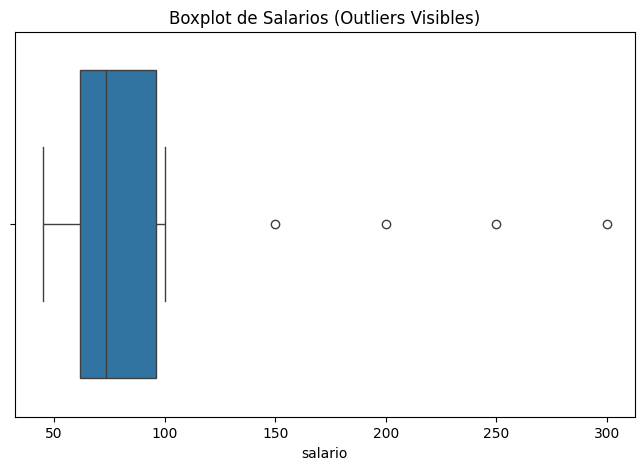

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["salario"])
plt.title("Boxplot de Salarios (Outliers Visibles)")
plt.show()

In [8]:
Q1 = df["salario"].quantile(0.25)
Q3 = df["salario"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df["salario"] < limite_inferior) | (df["salario"] > limite_superior)]
print("Outliers detectados:\n", outliers)

Outliers detectados:
     salario
16      150
17      200
18      250
19      300


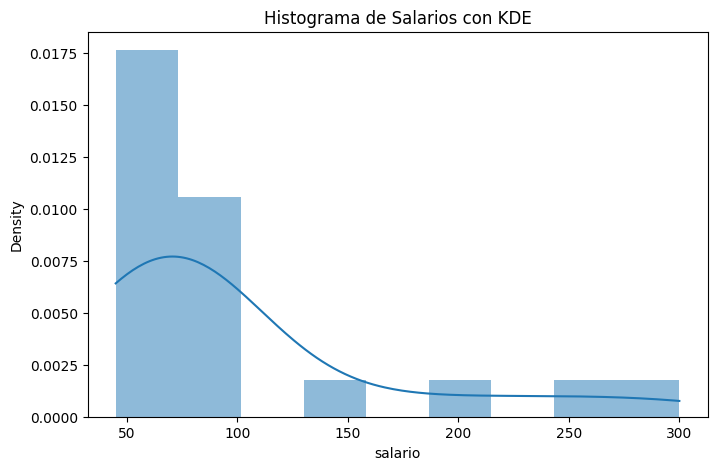

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df["salario"], kde=True, stat="density", linewidth=0)
plt.title("Histograma de Salarios con KDE")
plt.show()

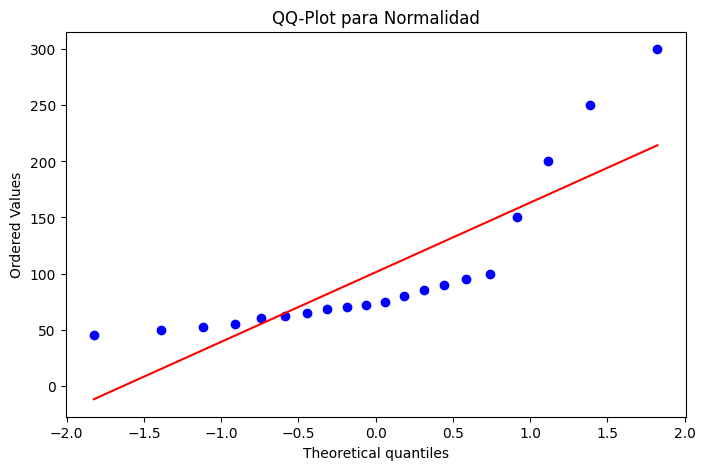

In [10]:
plt.figure(figsize=(8, 5))
stats.probplot(df["salario"], dist="norm", plot=plt)
plt.title("QQ-Plot para Normalidad")
plt.show()

In [11]:
stat, p_valor = stats.shapiro(df["salario"])
print(f"Shapiro-Wilk: p-valor = {p_valor:.4f}")

if p_valor > 0.05:
    print("Los datos parecen normales (no rechazamos H0)")
else:
    print("Los datos NO son normales (rechazamos H0)")

Shapiro-Wilk: p-valor = 0.0001
Los datos NO son normales (rechazamos H0)


In [ ]:
### si decidimos eliminar los outlier
df_clean = df[(df["salario"] >= limite_inferior) & (df["salario"] <= limite_superior)]